# Predict

In [156]:
import pandas as pd
import numpy as np
import tensorflow as tf
import progressbar

from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error

from tensorflow.keras.layers.experimental.preprocessing import Normalization

from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt

In [157]:
#df = pd.read_csv('c_data/data.csv')
df = pd.read_csv('c_data_html/data.csv')
df

,temp1,temp2,dewPt1,dewPt2,press1,press2,humid1,humid2,wdir1,wdir2,...,wspeed_max2,rain1,rain2,is_rain1,is_rain2,y_temp,y_temp_min,y_temp_max,y_rain,y_is_rain
0,26.5,27.1,21.0,21.0,1007.85,1008.36,74.6,70.6,9.0,6.0,...,15.0,0.0,0.0,0,0,27.2,24.0,32.0,0.0,0
1,27.1,27.2,21.0,21.9,1008.36,1008.59,70.6,73.4,6.0,8.0,...,19.0,0.0,0.0,0,0,27.4,23.0,32.0,0.0,0
2,27.2,27.4,21.9,20.0,1008.59,1007.80,73.4,65.2,8.0,4.0,...,17.0,0.0,0.0,0,0,27.0,23.0,33.0,0.0,0
3,27.4,27.0,20.0,21.8,1007.80,1007.95,65.2,74.7,4.0,6.0,...,17.0,0.0,0.0,0,0,26.5,23.0,33.0,0.0,0
4,27.0,26.5,21.8,21.3,1007.95,1008.61,74.7,74.8,6.0,6.0,...,28.0,0.0,0.0,0,0,26.7,21.0,33.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,27.2,27.2,20.9,22.2,1009.24,1009.80,70.1,75.7,11.0,11.0,...,15.0,0.0,0.0,0,0,27.0,23.0,33.0,0.0,0
3634,27.2,27.0,22.2,21.0,1009.80,1009.78,75.7,72.5,11.0,10.0,...,17.0,0.0,0.0,0,0,26.2,23.0,31.0,0.0,0
3635,27.0,26.2,21.0,20.5,1009.78,1010.34,72.5,72.7,10.0,12.0,...,13.0,0.0,0.0,0,0,26.6,21.0,32.0,0.0,0
3636,26.2,26.6,20.5,21.0,1010.34,1009.95,72.7,73.9,12.0,11.0,...,17.0,0.0,0.0,0,0,28.1,24.0,33.0,0.0,0


In [158]:
columns = ['y_temp', 'y_temp_min', 'y_temp_max', 'y_rain', 'y_is_rain']
X = df[[col for col in df.columns if col not in columns]]

# I. Linear Regression


In [159]:
def linear_regression(df, X, name_of_y, name_of_label, name_of_value):
    y = df[name_of_y]
    
    ##  Chia dataset 80% train và 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    
    print("Dự đoán "+name_of_label)

    print(f"The Explained Variance: {regressor.score(X_test, y_test):.2f}")
    print(f"The Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f} "+name_of_value)
    print(f"The Median Absolute Error: {median_absolute_error(y_test, y_pred):.2f} "+name_of_value)
    print("-------------")
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(211)
    ax.set_ylabel(name_of_label)
    ax.set_title('Predict vs Actual')

    ax.plot(np.array(y_test[:20]))
    ax.plot(y_pred[:20])
    plt.show()

**Training**

Dự đoán nhiệt độ trung bình
The Explained Variance: 0.70
The Mean Absolute Error: 0.63 degrees celsius
The Median Absolute Error: 0.52 degrees celsius
-------------


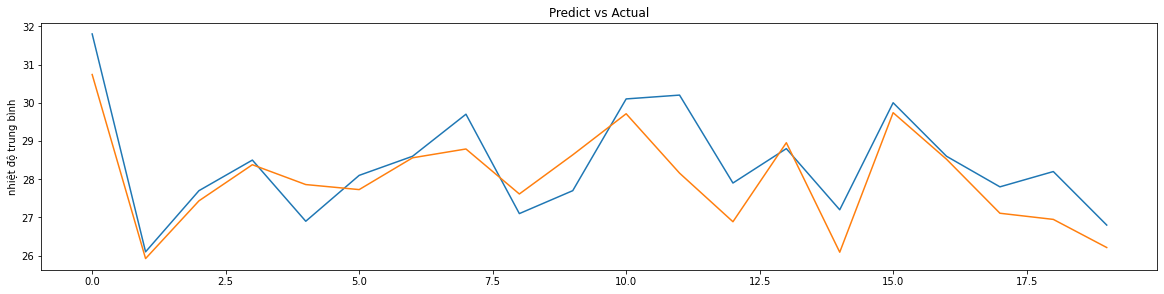

Dự đoán nhiệt độ thấp nhất
The Explained Variance: 0.73
The Mean Absolute Error: 0.72 degrees celsius
The Median Absolute Error: 0.61 degrees celsius
-------------


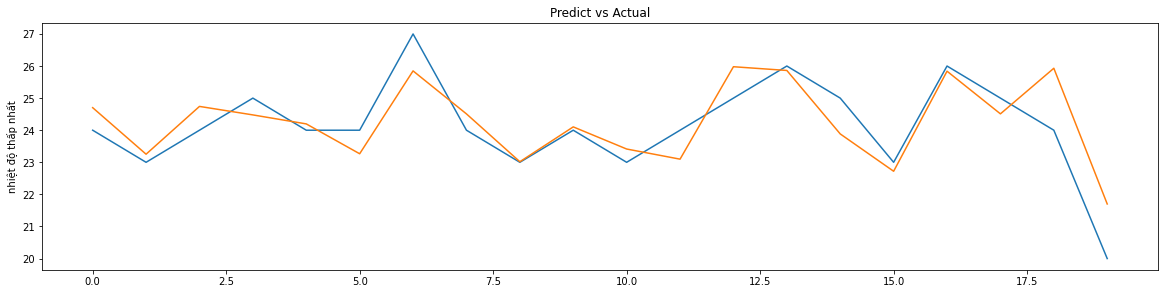

Dự đoán nhiệt độ cao nhất
The Explained Variance: 0.73
The Mean Absolute Error: 0.72 degrees celsius
The Median Absolute Error: 0.61 degrees celsius
-------------


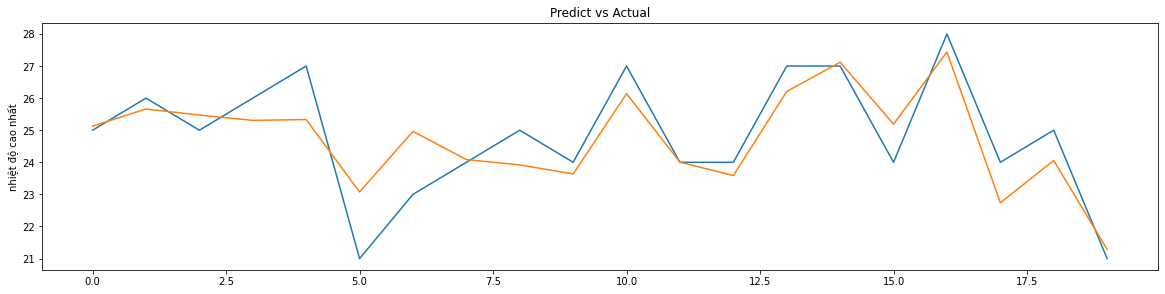

Dự đoán tỉ lệ mưa
The Explained Variance: 0.34
The Mean Absolute Error: 0.04 
The Median Absolute Error: 0.02 
-------------


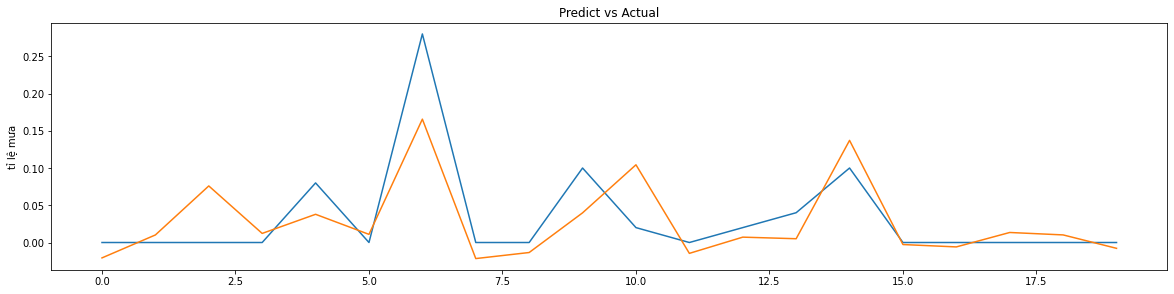

In [160]:
linear_regression(df, X, 'y_temp', 'nhiệt độ trung bình', 'degrees celsius')
linear_regression(df, X, 'y_temp_min', 'nhiệt độ thấp nhất', 'degrees celsius')
linear_regression(df, X, 'y_temp_min', 'nhiệt độ cao nhất', 'degrees celsius')
linear_regression(df, X, 'y_rain', 'tỉ lệ mưa', '')

# II. Logistic Regression

In [161]:
def calculate_accuracy_classifier(pred, y):
    tp = np.sum(np.logical_and(pred, y))
    fp = np.sum(np.logical_and(pred, np.logical_not(y)))
    tn = np.sum(np.logical_and(np.logical_not(pred), np.logical_not(y)))
    fn = np.sum(np.logical_and(np.logical_not(pred), y))

    tpr = 0 if (tp + fn == 0) else float(tp) / float(tp + fn)
    fpr = 0 if (fp + tn == 0) else float(fp) / float(fp + tn)
    acc = float(tp + tn) / len(pred)
    
    print(f'Accuracy: {acc: .2f}')
    print(f'TPR: {tpr: .2f}')
    print(f'FPR: {fpr: .2f}')

In [162]:
def logistic_regression(df, X, name_of_y, name_of_label, name_of_value):
    y = df[name_of_y]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = LogisticRegression(max_iter=10000)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    print("Dự đoán "+name_of_label)

    calculate_accuracy_classifier(y_pred,  y_test)
    
    return y_pred, y_test

In [163]:
y_pred, y_test = logistic_regression(df, X, 'y_is_rain', 'Có mưa hay không', '')

Dự đoán Có mưa hay không
Accuracy:  0.86
TPR:  0.81
FPR:  0.11


# III. Deep neural networks

In [164]:
def visualize_model(y_test, y_pred, name_of_label, name_of_value):
    print("Dự đoán "+name_of_label)

    print(f"The Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f} "+name_of_value)
    print(f"The Median Absolute Error: {median_absolute_error(y_test, y_pred):.2f} "+name_of_value)
    print("-------------")
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(211)
    ax.set_ylabel(name_of_label)
    ax.set_title('Predict vs Actual')

    ax.plot(np.array(y_test[:20]))
    ax.plot(y_pred[:20])
    plt.show()

In [165]:
## split data

X = df[[col for col in df.columns if col not in columns]].values

y = df[columns[0:3]].values
y_rain = df['y_rain'].values
y_is_rain = df['y_is_rain']

pos1 = int(X.shape[0] * 0.8)
pos2 = int(X.shape[0] * 0.875)

X_train = X[:pos1]
X_val = X[pos1:pos2]
X_test = X[pos2:]

y_train = y[:pos1]
y_val = y[pos1:pos2]
y_test = y[pos2:]

y_rain_train = y_rain[:pos1]
y_rain_val = y_rain[pos1:pos2]
y_rain_test = y_rain[pos2:]

y_is_rain_train = y_is_rain[:pos1]
y_is_rain_val = y_is_rain[pos1:pos2]
y_is_rain_test = y_is_rain[pos2:]

### Regression model cho y_temp y_temp_min y_temp_max

In [166]:

model = Sequential()
model.add(Dense(128, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer='random_normal', bias_initializer='zeros'))
model.add(Dense(96, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer='random_normal', bias_initializer='zeros'))
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer='random_normal', bias_initializer='zeros'))
model.add(Dense(3))
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=200, shuffle=True)
# evaluate the keras model
predict_on_test = model.predict(X_test)

Epoch 1/50
15/15 [==============================] - 0s 8ms/step - loss: 621.2099 - mean_absolute_error: 16.9816 - val_loss: 32.9464 - val_mean_absolute_error: 4.5031
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 16.2785 - mean_absolute_error: 3.1738 - val_loss: 3.2537 - val_mean_absolute_error: 1.4458
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 4.4858 - mean_absolute_error: 1.6641 - val_loss: 2.5153 - val_mean_absolute_error: 1.2308
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 3.6046 - mean_absolute_error: 1.4737 - val_loss: 2.1441 - val_mean_absolute_error: 1.1525
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 2.9697 - mean_absolute_error: 1.3154 - val_loss: 2.3313 - val_mean_absolute_error: 1.2144
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 2.8984 - mean_absolute_error: 1.2965 - val_loss: 2.2447 - val_mean_absolute_error: 1.1943
Epoch 7/50
15/15 [=====

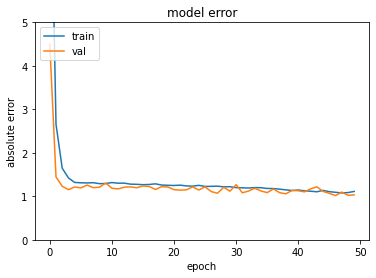

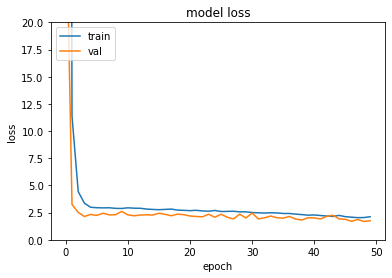

In [167]:
plt.ylim(0, 5)

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model error')
plt.ylabel('absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.ylim(0, 20)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Dự đoán nhiệt độ trung bình
The Mean Absolute Error: 0.80 degree calsius
The Median Absolute Error: 0.67 degree calsius
-------------


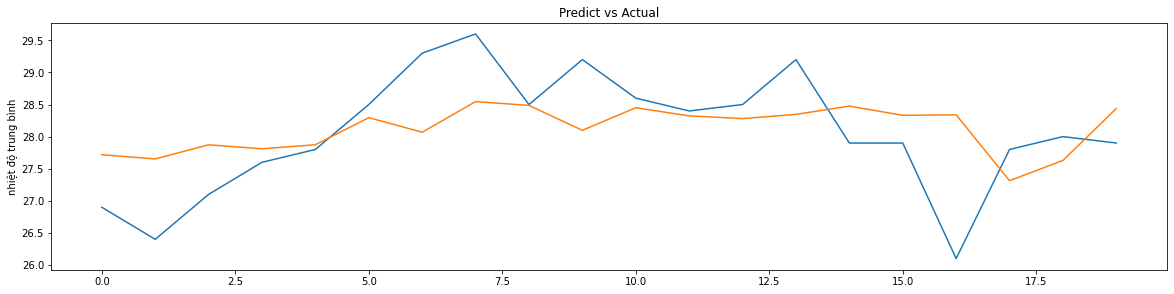

Dự đoán nhiệt độ thấp nhất
The Mean Absolute Error: 1.33 degree calsius
The Median Absolute Error: 1.17 degree calsius
-------------


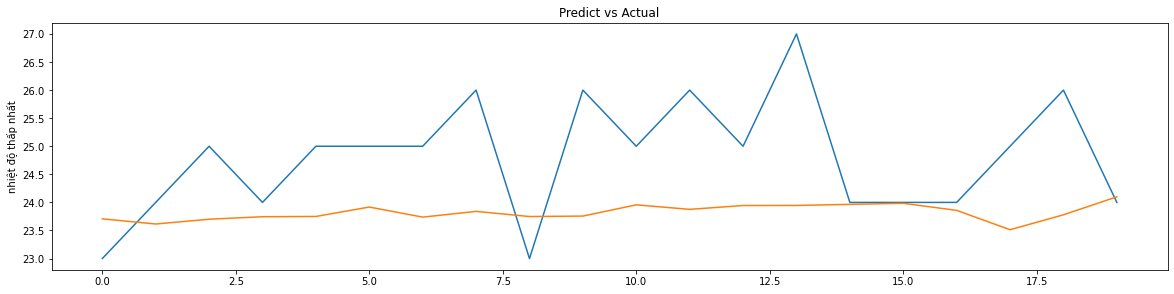

Dự đoán nhiệt độ cao nhất
The Mean Absolute Error: 1.13 degree calsius
The Median Absolute Error: 0.81 degree calsius
-------------


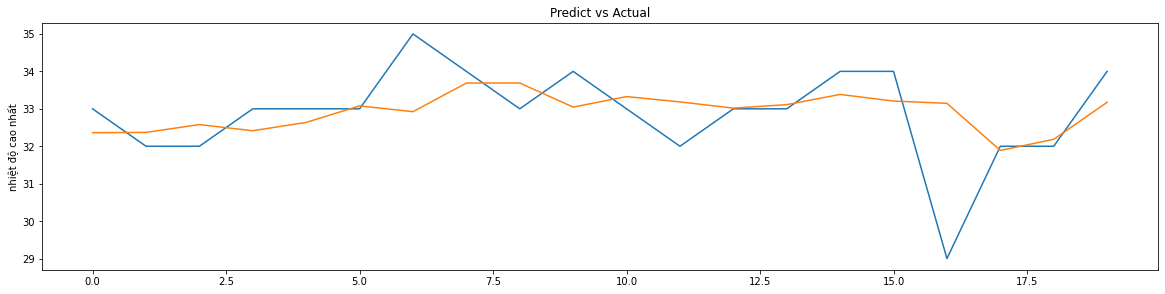

In [168]:

visualize_model(y_test[:,0], predict_on_test[:,0], "nhiệt độ trung bình", 'degree calsius')
visualize_model(y_test[:,1], predict_on_test[:,1], "nhiệt độ thấp nhất", 'degree calsius')
visualize_model(y_test[:,2], predict_on_test[:,2], "nhiệt độ cao nhất", 'degree calsius')


### Regression model cho y_rain

Vì biến số này chỉ giao động từ 0-1 nên nếu để chung với model nhiệt độ sẽ gây nhiễu, nên để riêng 1 model khác

In [173]:
model = Sequential()
model.add(Dense(96, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer='random_normal', bias_initializer='zeros'))
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer='random_normal', bias_initializer='zeros'))
model.add(Dense(1))
# compile the keras model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
# fit the keras model on the dataset
history = model.fit(X_train, y_rain_train, validation_data=(X_val, y_rain_val), epochs=50, batch_size=200, shuffle=True)
# evaluate the keras model
predict_on_test = model.predict(X_test)

Epoch 1/50
15/15 [==============================] - 0s 8ms/step - loss: 1203.0893 - mean_absolute_error: 29.2556 - val_loss: 48.4550 - val_mean_absolute_error: 6.9582
Epoch 2/50
15/15 [==============================] - 0s 3ms/step - loss: 56.5342 - mean_absolute_error: 6.5865 - val_loss: 49.5618 - val_mean_absolute_error: 7.0374
Epoch 3/50
15/15 [==============================] - 0s 3ms/step - loss: 21.1972 - mean_absolute_error: 4.0918 - val_loss: 11.2945 - val_mean_absolute_error: 3.3553
Epoch 4/50
15/15 [==============================] - 0s 3ms/step - loss: 5.8971 - mean_absolute_error: 2.1849 - val_loss: 2.1912 - val_mean_absolute_error: 1.4681
Epoch 5/50
15/15 [==============================] - 0s 3ms/step - loss: 1.3773 - mean_absolute_error: 1.0445 - val_loss: 0.6502 - val_mean_absolute_error: 0.7841
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.3645 - mean_absolute_error: 0.5080 - val_loss: 0.2207 - val_mean_absolute_error: 0.4324
Epoch 7/50
15/15 [=

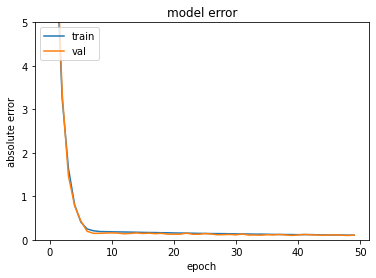

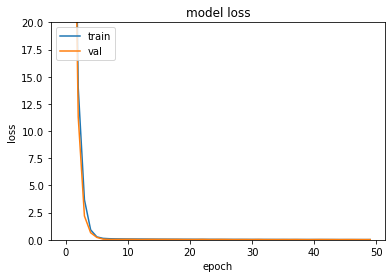

In [174]:
plt.ylim(0, 5)

plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model error')
plt.ylabel('absolute error')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.ylim(0, 20)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Dự đoán tỉ lệ mưa
The Mean Absolute Error: 0.12 
The Median Absolute Error: 0.09 
-------------


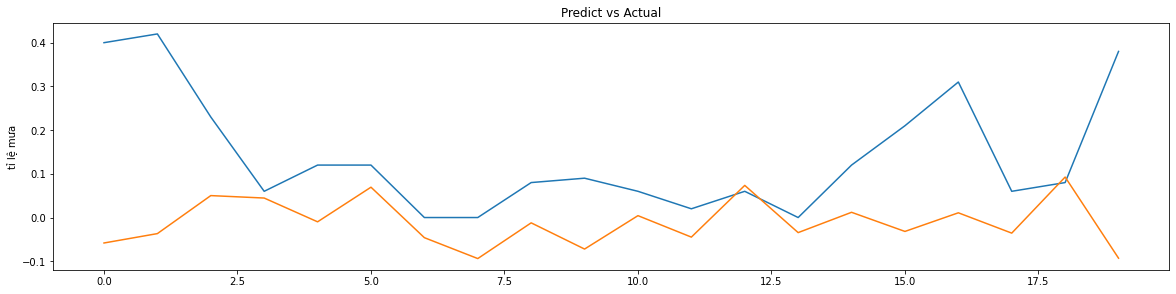

In [175]:
visualize_model(y_rain_test, predict_on_test, "tỉ lệ mưa", '')

### Model cho y_is_rain

Biến số này là biến nhị phân nên buộc không thể để chung với các biến khác

In [179]:

model = Sequential()
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer='random_normal', bias_initializer='zeros'))
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha=0.2), kernel_initializer='random_normal', bias_initializer='zeros'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_is_rain_train, validation_data=(X_val, y_is_rain_val), epochs=100, batch_size=200, shuffle=True)
# evaluate the keras model
_, accuracy = model.evaluate(X_test, y_is_rain_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
15/15 [==============================] - 0s 9ms/step - loss: 12.6733 - accuracy: 0.5286 - val_loss: 1.4857 - val_accuracy: 0.5714
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 3.3036 - accuracy: 0.6026 - val_loss: 4.0601 - val_accuracy: 0.4286
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 1.6219 - accuracy: 0.6693 - val_loss: 0.7097 - val_accuracy: 0.5714
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.7825 - accuracy: 0.5896 - val_loss: 0.8162 - val_accuracy: 0.4286
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6020 - accuracy: 0.7145 - val_loss: 0.9978 - val_accuracy: 0.4286
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5824 - accuracy: 0.7267 - val_loss: 1.0194 - val_accuracy: 0.4286
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.5861 - accuracy: 0.7199 - val_loss: 0.9192 - val_accuracy: 0.4286
Epoch 8/100


Epoch 59/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3287 - accuracy: 0.8754 - val_loss: 0.6893 - val_accuracy: 0.6484
Epoch 60/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8590 - val_loss: 0.7093 - val_accuracy: 0.6337
Epoch 61/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8525 - val_loss: 0.4840 - val_accuracy: 0.7766
Epoch 62/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3446 - accuracy: 0.8630 - val_loss: 0.5155 - val_accuracy: 0.7582
Epoch 63/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3190 - accuracy: 0.8781 - val_loss: 0.5602 - val_accuracy: 0.7216
Epoch 64/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.8702 - val_loss: 0.4665 - val_accuracy: 0.8132
Epoch 65/100
15/15 [==============================] - 0s 3ms/step - loss: 0.3475 - accuracy: 0.8692 - val_loss: 0.5023 - val_accuracy: 0.8059
Epoch 

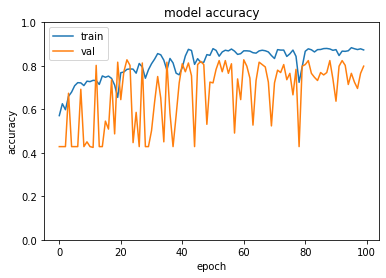

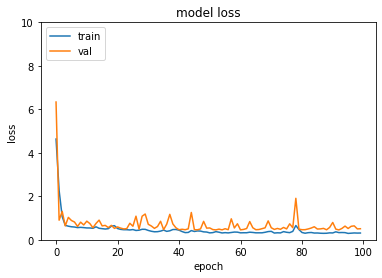

In [177]:
plt.ylim(0, 1)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.ylim(0, 10)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [182]:
y_pred = model.predict(X_test)
y_pred = [1 if y >=0.5 else 0 for y in y_pred]
calculate_accuracy_classifier(y_pred,  y_is_rain_test)

Accuracy:  0.69
TPR:  0.54
FPR:  0.16
